In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

In [12]:
# Image width and height; parameters for the plot
im_width, im_height = 512,512
c = complex(0.3467, 0)
zabs_max = 10
nit_max = 2**8             #higer is slow
xmin, xmax = -1.5, 1.5
xwidth = xmax - xmin
ymin, ymax = -1.5, 1.5
yheight = ymax - ymin

In [13]:
julia = np.zeros((im_width, im_height))                            #2d array, define as function to make dynamic?
for ix in range(im_width):                                       
    for iy in range(im_height):
        nit = 0                                                    #reset counter
        # Map pixel position to a point in the complex plane
        z = complex(ix / im_width * xwidth + xmin,              
                    iy / im_height * yheight + ymin)
        # Do the iterations
        while abs(z) <= zabs_max and nit < nit_max:
            z = z**2 + c
            nit += 1
        shade = 1-np.sqrt(nit / nit_max)
        ratio = nit / nit_max
        julia[ix,iy] = ratio

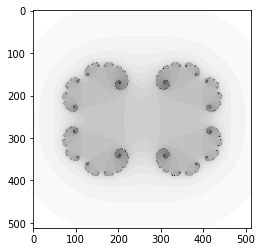

<Figure size 3840x3840 with 0 Axes>

In [14]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,15),dpi=256)
ax.imshow(julia, interpolation='nearest', cmap='binary')
plt.show()